# Time Series Prediction Models using Scikit Learn

### Linear Regression Model

##### No enhance performance

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load Dataset
stock_prices = pd.read_csv(r'C:\Data Project\stock_prices_analysis\input\output_query.csv')
stock_prices['date'] = pd.to_datetime(stock_prices['date'])
stock_prices['Year'] = stock_prices['date'].dt.year
stock_prices['Month'] = stock_prices['date'].dt.month
stock_prices['Day'] = stock_prices['date'].dt.day
stock_prices.head(5)

# Target Stock price to predict
target_stock = 'tech_GOOGL'

# Seperate feature (all stock price except 'tech_GOOGL and stock in education industry' and 'date)
X = stock_prices.drop(columns = ['date', 'education_DUOL', 'education_COUR', 'education_CHGG', 'education_UDMY', target_stock])
y = stock_prices[target_stock]

# Split Training Set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [3]:
y_pred = model.predict(X_test)

In [4]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("R^2 Score: ", r2)

MSE:  15.477377949516107
R^2 Score:  0.9913332592674677


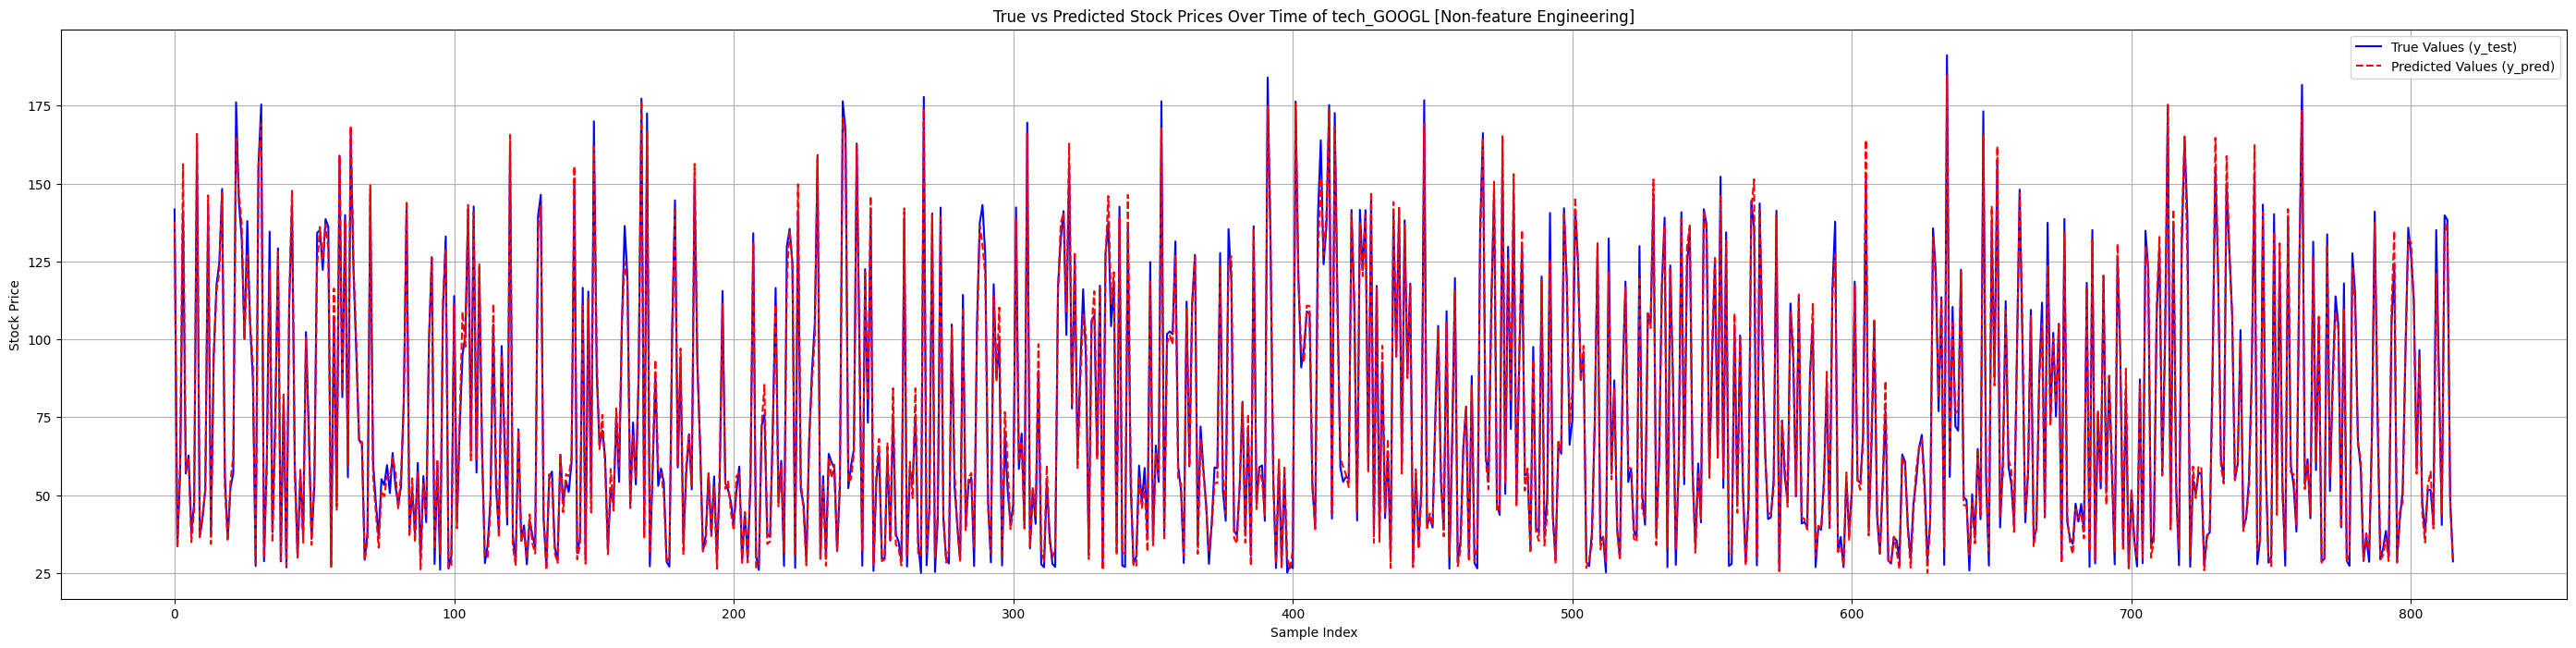

In [5]:
plt.figure(figsize= (35,8))
plt.plot(y_test.values, label="True Values (y_test)", color='b', linestyle='-')
plt.plot(y_pred, label="Predicted Values (y_pred)", color='r', linestyle='--')
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.title(f"True vs Predicted Stock Prices Over Time of {target_stock} [Non-feature Engineering]")
plt.grid(True)
plt.show()

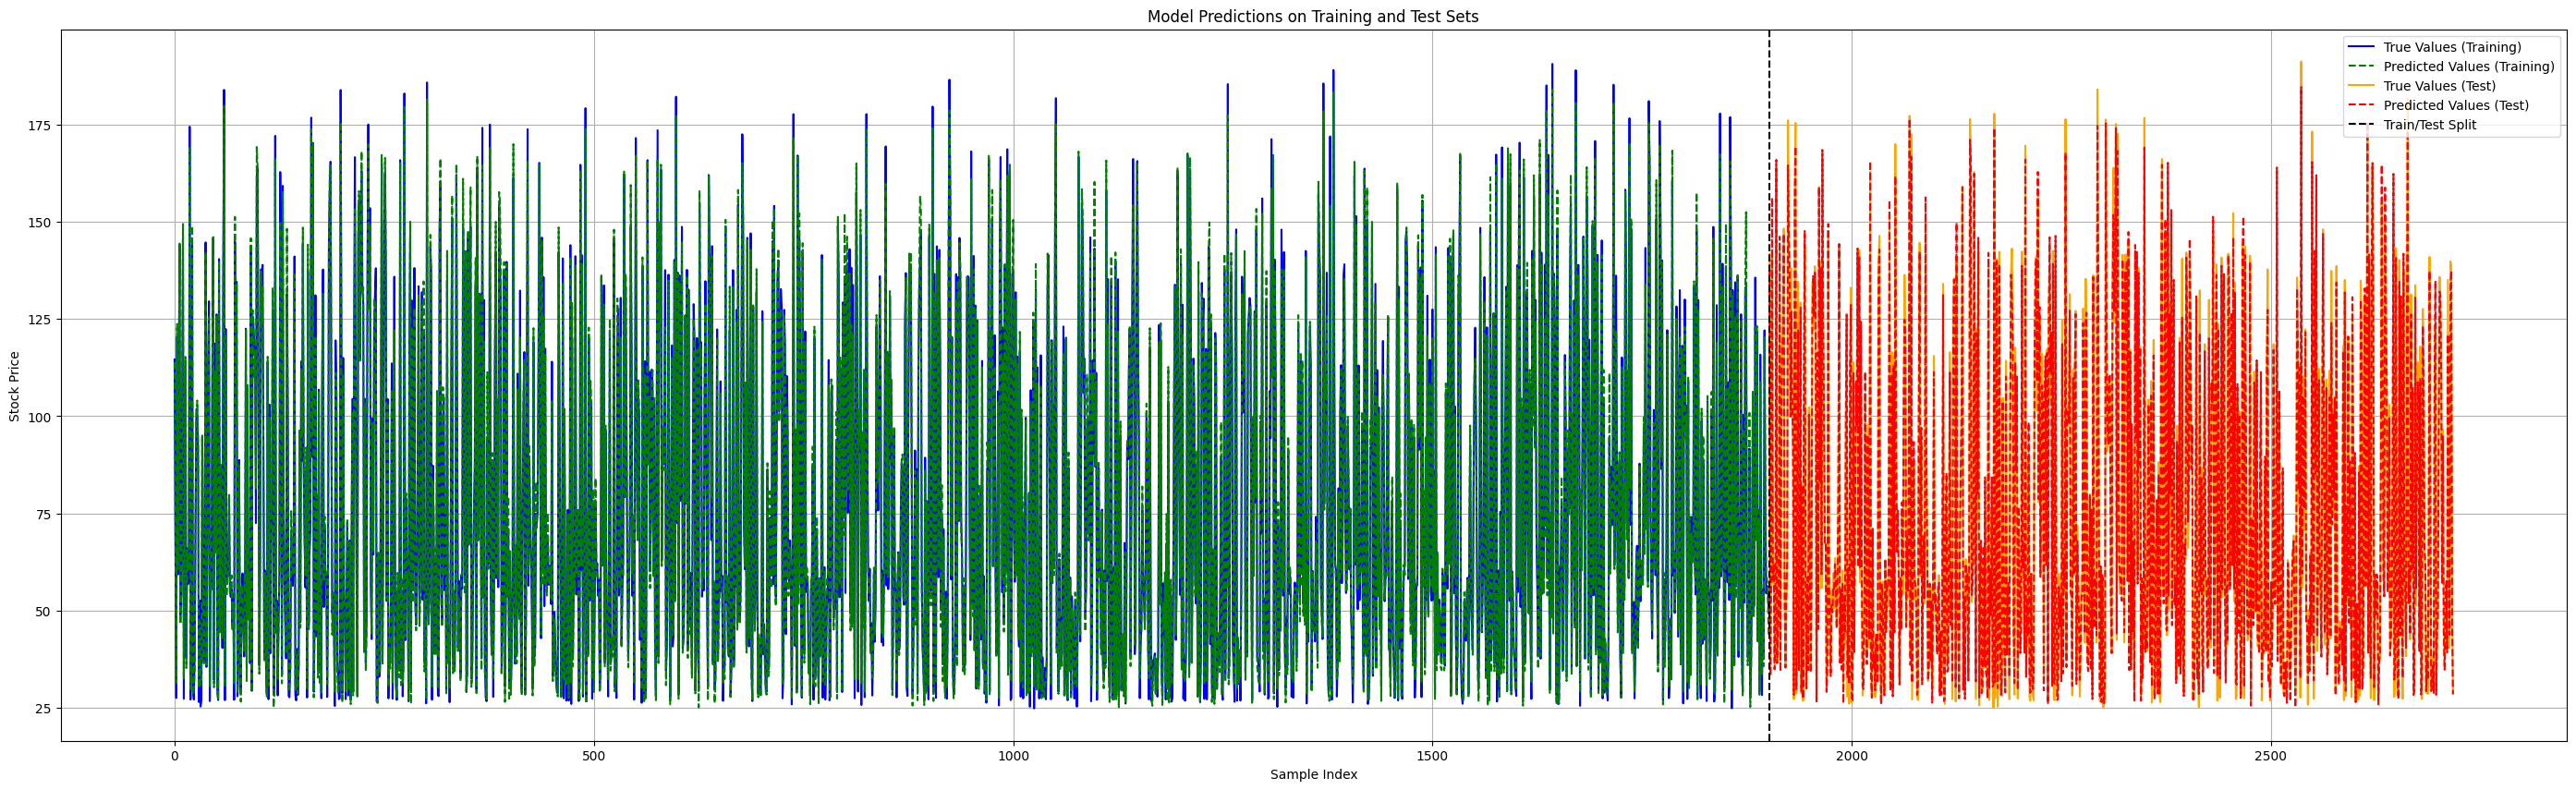

In [6]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Combine training and test sets
train_size = len(y_train)
test_size = len(y_test)

indices = np.arange(train_size + test_size)

y_true = pd.concat([y_train, y_test])
y_pred = np.concatenate([y_train_pred, y_test_pred])

plt.figure(figsize=(35, 10))
plt.plot(indices[:train_size], y_train, label="True Values (Training)", color="blue", linestyle="-")
plt.plot(indices[:train_size], y_train_pred, label="Predicted Values (Training)", color="green", linestyle="--")
plt.plot(indices[train_size:], y_test, label="True Values (Test)", color="orange", linestyle="-")
plt.plot(indices[train_size:], y_test_pred, label="Predicted Values (Test)", color="red", linestyle="--")

plt.axvline(x=train_size, color="black", linestyle="--", label="Train/Test Split")
plt.title("Model Predictions on Training and Test Sets")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

Result of Model predicted without any feature engineering

In [7]:
print("MSE: ", mse)
print("R^2 Score: ", r2)

MSE:  15.477377949516107
R^2 Score:  0.9913332592674677


#####  Feature Engineering

1. Add Moving Average (Short and Long term)  
2. Add Rolling standard deviation (detect volatility of stock and capture shoot of price predict)
3. Standardize Features (bring every feature to the same scale)

In [8]:
# Load Dataset
stock_prices = pd.read_csv(r'C:\Data Project\stock_prices_analysis\input\output_query.csv')
stock_prices.drop(columns=['education_DUOL', 'education_COUR', 'education_CHGG', 'education_UDMY'], inplace=True)

# Target Stock price to predict
target_stock = 'tech_GOOGL'

# Split Date feature
stock_prices['date'] = pd.to_datetime(stock_prices['date'])
stock_prices['Year'] = stock_prices['date'].dt.year
stock_prices['Month'] = stock_prices['date'].dt.month
stock_prices['Day'] = stock_prices['date'].dt.day

# Add Feature Engineering
stock_prices['GOOGL_SMA_5'] = stock_prices[target_stock].rolling(window=5).mean()
stock_prices['GOOGL_SMA_20'] = stock_prices[target_stock].rolling(window=20).mean()
stock_prices['GOOGL_volatility_5'] = stock_prices[target_stock].rolling(window=5).std()
stock_prices.dropna(inplace=True)
scaler = StandardScaler()

# Seperate feature (all stock price except 'tech_GOOGL and stock in education industry' and 'date)
X = stock_prices.drop(columns = ['date', target_stock])

X_scaled = scaler.fit_transform(X)
y = stock_prices[target_stock]

# Split Training Set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
mse_feature_eng = mean_squared_error(y_test, y_pred)
r2_feature_eng = r2_score(y_test, y_pred)

print("Compare Result on Mean Squared Error and R^2 Score between Un-feature engineering and Feature Engineering enhanced")
print(f"Non-Feature Engineering Predict on {target_stock}")
print("MSE: ", mse)
print("R^2 Score: ", r2)
print("----------")
print(f"Feature Engineering enhanced Predict on {target_stock}")
print("MSE: ", mse_feature_eng)
print("R^2 Score: ", r2_feature_eng)

Compare Result on Mean Squared Error and R^2 Score between Un-feature engineering and Feature Engineering enhanced
Non-Feature Engineering Predict on tech_GOOGL
MSE:  15.477377949516107
R^2 Score:  0.9913332592674677
----------
Feature Engineering enhanced Predict on tech_GOOGL
MSE:  2.237484408040411
R^2 Score:  0.9988489037686312


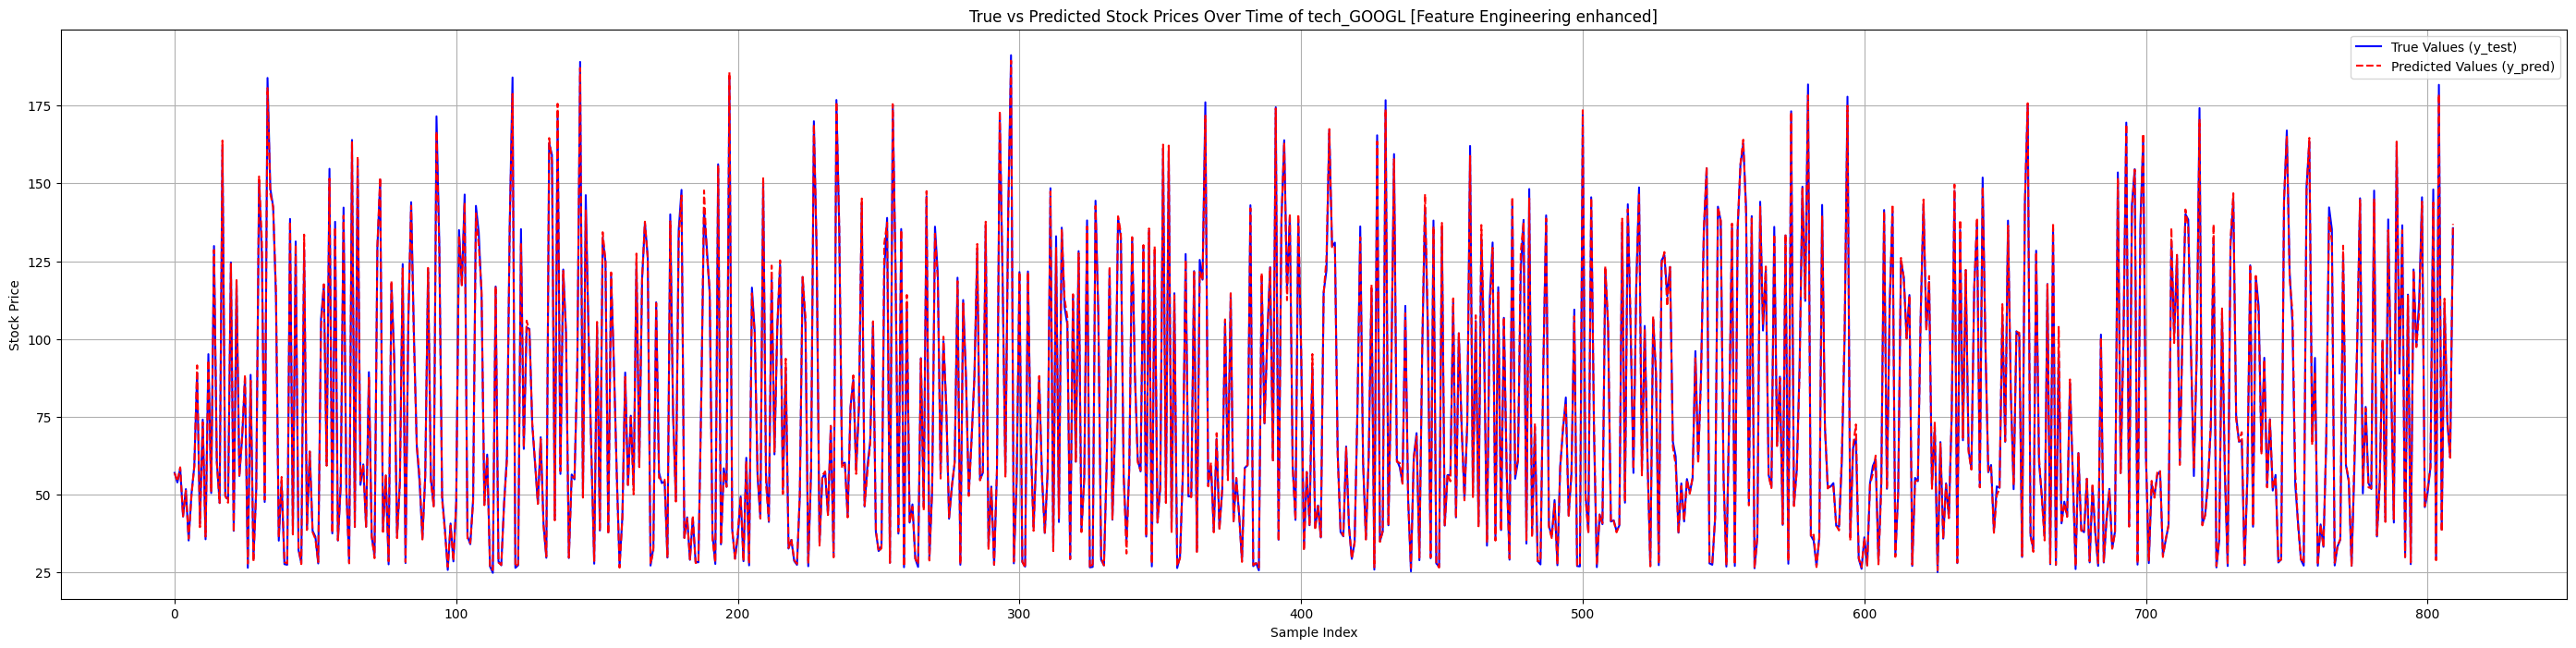

In [11]:
plt.figure(figsize= (35,8))
plt.plot(y_test.values, label="True Values (y_test)", color='b', linestyle='-')
plt.plot(y_pred, label="Predicted Values (y_pred)", color='r', linestyle='--')
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.title(f"True vs Predicted Stock Prices Over Time of {target_stock} [Feature Engineering enhanced]")
plt.grid(True)
plt.show()